In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trues = np.load("true.npy")
preds = np.load("pred.npy")
mean = np.load("mean.npy")
std = np.load("std.npy")

In [6]:
import torch
class StandardScaler():
    def __init__(self):
        self.mean = 0.
        self.std = 1.
    
    def fit(self, data):
        self.mean = data.mean(0)
        self.std = data.std(0)
        
    def setMeanStd(self, mean, std):
        self.mean = mean
        self.std = std

    def transform(self, data):
        mean = torch.from_numpy(self.mean).type_as(data).to(data.device) if torch.is_tensor(data) else self.mean
        std = torch.from_numpy(self.std).type_as(data).to(data.device) if torch.is_tensor(data) else self.std
        return (data - mean) / std

    def inverse_transform(self, data):
        mean = torch.from_numpy(self.mean).type_as(data).to(data.device) if torch.is_tensor(data) else self.mean
        std = torch.from_numpy(self.std).type_as(data).to(data.device) if torch.is_tensor(data) else self.std
        if data.shape[-1] != mean.shape[-1]:
            mean = mean[-1:]
            std = std[-1:]
        return (data * std) + mean

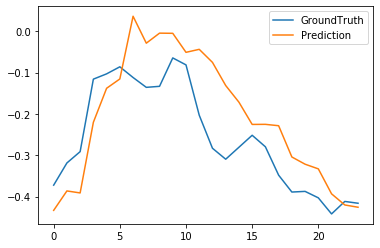

In [4]:
plt.figure()
plt.plot(trues[0,:,-1], label='GroundTruth')
plt.plot(preds[0,:,-1], label='Prediction')
plt.legend()
plt.show()

In [7]:
scaler = StandardScaler()
scaler.setMeanStd(mean, std)

In [8]:
np.savetxt("RealTrues.txt", scaler.inverse_transform(trues))

array([[[102.98999951],
        [108.07000113],
        [110.66499998],
        ...,
        [ 96.40000116],
        [ 99.26000083],
        [ 98.84500125]],

       [[108.07000113],
        [110.66499998],
        [127.27000032],
        ...,
        [ 99.26000083],
        [ 98.84500125],
        [ 99.9999996 ]],

       [[110.66499998],
        [127.27000032],
        [128.48000024],
        ...,
        [ 98.84500125],
        [ 99.9999996 ],
        [104.35500063]],

       ...,

       [[390.16001085],
        [419.45999797],
        [305.85999709],
        ...,
        [344.84000047],
        [357.39000012],
        [254.24499684]],

       [[419.45999797],
        [305.85999709],
        [217.31500097],
        ...,
        [357.39000012],
        [254.24499684],
        [236.70000409]],

       [[305.85999709],
        [217.31500097],
        [165.41000105],
        ...,
        [254.24499684],
        [236.70000409],
        [274.56500333]]])